In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import time
import datetime
import xarray
from mpas_xarray import preprocess_mpas, remove_repeated_time_index
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 10) # Large figures
dpi=200;

Populating the interactive namespace from numpy and matplotlib


In [2]:
### axis_font = {'fontname':'Arial', 'size':'18'}    
title_font = {'fontname':'Arial', 'size':'32', 'color':'black', 'weight':'normal'}
matplotlib.rc('xtick', labelsize=28)
matplotlib.rc('ytick', labelsize=28)

In [3]:
ds = xarray.open_dataset('/lcrc/group/acme/lvanroe/subsetNCO.nc')

In [15]:
dsM = xarray.open_dataset('/lcrc/group/acme/lvanroe/mpaso.hist.0002-01-01_00000.nc')

In [4]:
nC = ds.dims['nCells']

In [5]:
ds.divergenceHU.shape

(12, 235160, 100)

In [6]:
maxL = ds.maxLevelCell.values

In [7]:
div = ds.divergenceHU.values
divVT = ds.divergenceTransportVel.values
rel = ds.relativeVorticityCell.values

In [8]:
divergenceBot = np.zeros((12,nC))
relVortBot = np.zeros((12,nC))
divergenceVTBot = np.zeros((12,nC))
for i in range(nC):
    divergenceBot[:,i] = div[:,i,maxL[i]-1]
    divergenceVTBot[:,i] = divVT[:,i,maxL[i]-1]
    relVortBot[:,i] = rel[:,i,maxL[i]-1]

In [9]:
ds.close()

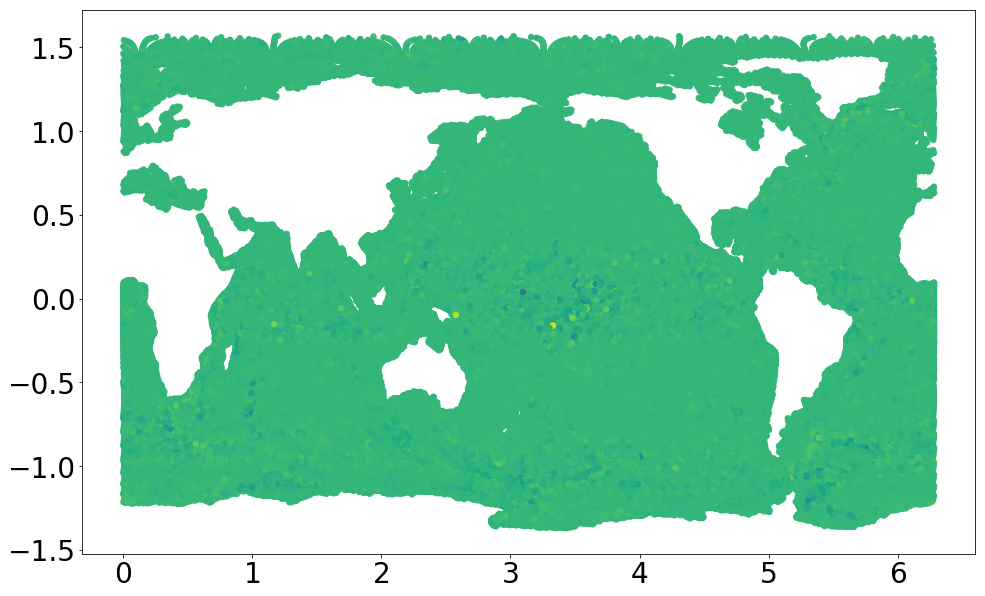

In [19]:
plt.scatter(dsM.lonCell,dsM.latCell,s=30,c=divergenceBot[0,:]-divergenceVTBot[0,:])

In [10]:
ncid=Dataset('/lcrc/group/acme/lvanroe/subsetNCO.nc','a',format='NETCDF3_CLASSIC')

In [11]:
ncid.createVariable('divergenceMaxLevel',float,('Time','nCells'))
ncid.createVariable('divergenceTransVelMaxLevel',float,('Time','nCells'))
ncid.createVariable('relativeVorticityMaxLevel',float,('Time','nCells'))


<type 'netCDF4._netCDF4.Variable'>
float64 relativeVorticityMaxLevel(Time, nCells)
unlimited dimensions: Time
current shape = (12, 235160)
filling off

In [12]:
ncid.variables['divergenceMaxLevel'][:,:] = divergenceBot
ncid.variables['divergenceTransVelMaxLevel'][:,:] = divergenceVTBot
ncid.variables['relativeVorticityMaxLevel'][:,:] = relVortBot

In [13]:
ncid.close()

In [33]:
dsM = xarray.open_dataset('/home/ccsm-data/inputdata/ocn/mpas-o/oEC60to30v3/oEC60to30v3.161222.nc')
dsM60 = xarray.open_dataset('/home/ccsm-data/inputdata/ocn/mpas-o/oEC60to30v3/oEC60to30v3_60layer.170506.nc')

In [ ]:
dsPP = xarray.open_mfdataset('/lcrc/group/acme/jwolfe/acme_scratch/20170522.noKPP.A_WCYCL1850S.ne30_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.000[1-5]*',concat_dim='Time')
dsKPP = xarray.open_mfdataset('/lcrc/group/acme/jwolfe/acme_scratch/20170512.60levs.A_WCYCL1850S.ne30_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.000[1-5]*',concat_dim='Time')


In [ ]:
dsPOP = xarray.open_mfdataset('/lcrc/group/acme/jwolfe/acme_scratch/20170607.POP.A_WCYCL1850v0.ne30_g16.anvil/run/20170607.POP.A_WCYCL1850v0.ne30_g16.anvil.pop.h.000[1-5]*',concat_dim='time',decode_times=False)

In [ ]:
dsPP.timeMonthly_avg_vertTransportVelocityTop.shape

In [ ]:
dsPOP.TEMP.shape

In [ ]:
area = dsM.areaCell.values

In [ ]:
#create an array of areas
area2 = np.vstack([area, area])
while area2.shape[0] <= 60:
    area2 = np.vstack([area2,area])
area3 = area2.T

In [ ]:
nt = dsPP.dims['Time']
nC = dsPP.dims['nCells']
nz = dsPP.dims['nVertLevelsP1']
areaPP = np.zeros((nt,nC,nz))
for i in range(nt):
    areaPP[i,:,:] = area3

In [ ]:
area1 = dsPOP.TAREA.values
areaPOP = np.zeros((60,60,384,320))
for i in range(60):
    areaPOP[:,i,:,:] = area1

In [ ]:
totarea = sum(area)

In [ ]:
totareaPOP = dsPOP.TAREA[0,:,:].sum().values

In [ ]:
viscSumPOP = (dsPOP.VDC_T*areaPOP).sum(axis=(3,2)) / totareaPOP * 1E-4

In [ ]:
tempPOP = (dsPOP.TEMP*areaPOP).sum(axis=(3,2)) / totareaPOP

In [ ]:
vvelSumPOP = (dsPOP.WVEL*areaPOP).sum(axis=(3,2)) / totareaPOP

In [ ]:
viscSumPP = (dsPP.timeMonthly_avg_vertViscTopOfCell[:,:,:]*areaPP).sum(axis=1) / totarea
vvelSumPP = (dsPP.timeMonthly_avg_vertTransportVelocityTop[:,:,:]*areaPP).sum(axis=1) / totarea
#tempSumPP = (dsPP.timeMonthly_avg_activeTracers_temperature[:,:,:]*areaPP[:,:,:60]).sum(axis=1) / totarea

viscSumKPP = (dsKPP.timeMonthly_avg_vertViscTopOfCell[:,:,:]*areaPP).sum(axis=1) / totarea
vvelSumKPP = (dsKPP.timeMonthly_avg_vertTransportVelocityTop[:,:,:]*areaPP).sum(axis=1) / totarea
#tempSumKPP = (dsKPP.timeMonthly_avg_activeTracers_temperature[:,:,:]*areaPP[:,:,:60]).sum(axis=1) / totarea

In [ ]:
PosvvelKPP = (abs(dsKPP.timeMonthly_avg_vertTransportVelocityTop[:,:,:])*areaPP).sum(axis=1) / totarea
PosvvelPP = (abs(dsPP.timeMonthly_avg_vertTransportVelocityTop[:,:,:])*areaPP).sum(axis=1) / totarea

In [ ]:
PosvvelPOP = (abs(dsPOP.WVEL)*areaPOP).sum(axis=(3,2)) / totareaPOP

In [ ]:
#fix up temperature
tvals = dsKPP.timeMonthly_avg_activeTracers_temperature*areaPP[:,:,:60]
tv2 = tvals.where(tvals>-2)
tempSumKPP=tv2.sum(axis=1)/totarea

tvals = dsPP.timeMonthly_avg_activeTracers_temperature*areaPP[:,:,:60]
tv2 = tvals.where(tvals>-2)
tempSumPP=tv2.sum(axis=1)/totarea

In [ ]:
#get rough distance between centers and layer tops
dzt = np.zeros(60)
dzc = np.zeros(60)
dzt[0] = 10
for i in range(1,60):
    dzt[i] = abs(dsM.refBottomDepth[i-1].values - dsM.refBottomDepth[i].values)
    dzc[i-1] = 0.5*(dzt[i-1]+dzt[i])

In [ ]:
#Form dtdz
dtdzPP = (tempSumPP[:,:59] - tempSumPP[:,1:]) / dzc[:59]
dtdzKPP = (tempSumKPP[:,:59] - tempSumKPP[:,1:]) / dzc[:59]

In [ ]:
dtdzPOP = (tempPOP[:,:59].values - tempPOP[:,1:].values) / dsPOP.dzw[:,:59].values * 100

In [ ]:
advFluxPOP = vvelSumPOP[:,1:60].values*dtdzPOP
viscFluxPOP = viscSumPOP[:,1:60].values*dtdzPOP

In [ ]:
advFluxKPP = vvelSumKPP[:,1:60].values*dtdzKPP.values
viscFluxKPP = viscSumKPP[:,1:60].values*dtdzKPP.values

#advFluxPP = vvelSumPP[:,1:60].values*dtdzPP.values
viscFluxPP = viscSumPP[:,1:60].values*dtdzPP.values

In [ ]:
advFluxPP = vvelSumPP[:,1:60].values*dtdzPP.values


In [ ]:
plt.plot(advFluxPP[13,:],-dsM.refBottomDepth[:59],'r')
plt.plot(advFluxPOP[13,:],-dsPOP.z_w[:59].values/100,'k')
plt.plot(advFluxKPP[13,:]/10,-dsM.refBottomDepth[:59],'b')
plt.ylim(-500,0)
#plt.xlim(0,1E-3)

In [ ]:
plt.plot(viscFluxPP[13,:]/10,-dsM.refBottomDepth[:59],'r')
plt.plot(viscFluxPOP[13,:]/10,-dsPOP.z_w[:59].values/100,'k')
plt.plot(viscFluxKPP[13,:]/10,-dsM.refBottomDepth[:59],'b')
plt.ylim(-500,0)
plt.xlim(0,1E-3)

In [ ]:
plt.contourf(np.linspace(0,60,60),-dsPOP.z_w[:].values/100,viscSumPOP[:,:].T/10,levels=np.linspace(1E-6,.006,31))
plt.colorbar()
plt.ylim(-600,0)

In [ ]:
bld = np.zeros(60)
for i in range(60):
    bld[i] = (dsKPP.timeMonthly_avg_boundaryLayerDepth[i,:]*area).sum() / totarea

In [ ]:
plt.contourf(np.linspace(0,60,60),-dsM.refBottomDepth[:],viscSumKPP[:,1:].T/10,levels=np.linspace(1E-6,.006,31))
plt.colorbar()
plt.plot(np.linspace(0,60,60),-bld,'r',linewidth=4,)
plt.ylim(-600,0)

In [ ]:
plt.contourf(np.linspace(0,60,60),-dsM.refBottomDepth[:],(tempSumKPP[:,:] - tempSumKPP[0,:]).T,levels=np.linspace(-1,1,31),cmap='seismic')
plt.colorbar()
plt.ylim(-600,0)

In [ ]:
plt.contourf(np.linspace(0,60,60),-dsM.refBottomDepth[:],(tempPOP[:,:] - tempPOP[0,:]).T,levels=np.linspace(-1,1,31),cmap='seismic')
plt.colorbar()
plt.ylim(-1500,0)

In [ ]:
plt.contourf(np.linspace(0,60,60),-dsM.refBottomDepth[:],PosvvelKPP[:,1:].T,cmap='seismic',levels=np.linspace(0,5E-6,11))
plt.colorbar()
plt.ylim(-5600,0)

In [ ]:
plt.contourf(np.linspace(0,60,60),-dsM.refBottomDepth[:],PosvvelPOP[:,:].T/100,cmap='seismic',levels=np.linspace(0,5E-6,11))
plt.colorbar()
plt.ylim(-5600,0)

In [13]:
lonmin = 160.0 * np.pi / 180.
lonmax = 275.0 * np.pi / 180.
latmin = -1.0 * np.pi / 180.
latmax = 1.0 * np.pi / 180.

lonv = dsM.lonCell[:].values
latv = dsM.latCell[:].values

In [24]:
#Find indices of cells in box defined above
inds = np.where((lonv > lonmin) & (lonv < lonmax) & (latv < latmax) & (latv > latmin))[0]
dsEqB = dsM60.sel(nCells = inds)

In [6]:
from mpas_xarray import preprocess_mpas, remove_repeated_time_index

In [10]:
import glob
fnT1 = sorted(glob.glob('/lcrc/group/acme/jwolfe/acme_scratch/20170814.FCTfix-del4.GMPAS-IAF.T62_oECv3.anvil/run/mpaso.am.timeSeriesStatsMonthly.000*'))
#fnT2 = sorted(glob.glob('/lcrc/group/acme/jwolfe/acme_scratch/20170509.60levs.GMPAS-IAF.T62_oECv3.anvil/run/' + \
#                       'mpaso.hist.am.timeSeriesStatsMonthly.001*.nc'))
fn1 = fnT1 #+ fnT2
fnT1 = sorted(glob.glob('/lcrc/group/acme/jwolfe/acme_scratch/20170509.beta1.GMPAS-IAF.T62_oECv3.anvil/run/' + \
                       'mpaso.hist.am.timeSeriesStatsMonthly.0001-0[2-9]*.nc'))
fnT2 = sorted(glob.glob('/lcrc/group/acme/jwolfe/acme_scratch/20170509.beta1.GMPAS-IAF.T62_oECv3.anvil/run/' + \
                       'mpaso.hist.am.timeSeriesStatsMonthly.0001-1*.nc'))
fnT3 = sorted(glob.glob('/lcrc/group/acme/jwolfe/acme_scratch/20170509.beta1.GMPAS-IAF.T62_oECv3.anvil/run/' + \
                       'mpaso.hist.am.timeSeriesStatsMonthly.000[2-9]-*.nc'))
fnT4 = sorted(glob.glob('/lcrc/group/acme/jwolfe/acme_scratch/20170509.beta1.GMPAS-IAF.T62_oECv3.anvil/run/' + \
                       'mpaso.hist.am.timeSeriesStatsMonthly.001[0-8]-*.nc'))
fn = fnT1 + fnT2 + fnT3 + fnT4
#fn22 = sorted(glob.glob('/lcrc/group/acme/lvanroe/acme_scratch/GMPAS_IAF_oEC60to30v3_diurnal/run/mpaso.hist.am.timeSeriesStatsMonthly.008*.nc'))
#fn2 = sorted(glob.glob('/lcrc/group/acme/lvanroe/acme_scratch/GMPAS_IAF_oEC60to30v3_diurnal/run/mpaso.hist.am.timeSeriesStatsMonthly.008*.nc'))
#fn = fn2 + fn22

fnT1 = sorted(glob.glob('/lcrc/group/acme/jwolfe/acme_scratch/20170822.FCTfix-del2.GMPAS-IAF.T62_oECv3.anvil/run/mpaso.am.timeSeriesStatsMonthly.000*'))
#fnT2 = sorted(glob.glob('/lcrc/group/acme/jwolfe/acme_scratch/20170517.nonlocal-nodiff.A_WCYCL1850S.ne30_oECv3.anvil/run/' + \
#                       'mpaso.hist.am.timeSeriesStatsMonthly.0003-0*.nc'))
fn = fnT1 


fnT1 = sorted(glob.glob('/lcrc/group/acme/jwolfe/acme_scratch/20170509.beta1.GMPAS-IAF.T62_oECv3.anvil/run/' + \
                       'mpaso.hist.am.timeSeriesStatsMonthly.000[8-9]*.nc'))
#fnT2 = sorted(glob.glob('/lcrc/group/acme/jwolfe/acme_scratch/20170522.noKPP.A_WCYCL1850S.ne30_oECv3.anvil/run/' + \
#                       'mpaso.hist.am.timeSeriesStatsMonthly.001[0-5]-0*.nc'))
fn12 = fnT1 +fnT2

In [10]:
# strip small variables for later
import os
import glob
import shutil
import subprocess
import sys 

sys.path.insert(0,'/lcrc/group/acme/lvanroe/conda/bin')
varnamesF = ['timeMonthly_avg_activeTracerAdvectionTendency_temperatureAdvectionTendency,', \
             'timeMonthly_avg_activeTracerVertMixTendency_temperatureVertMixTendency,', \
            'timeMonthly_avg_activeTracerAdvectionTendency_salinityAdvectionTendency,', \
             'timeMonthly_avg_activeTracerVertMixTendency_salinityVertMixTendency']
        
varnames = ' '.join(varnamesF).replace(' ','')
flist = fn1
case = 'baselineB'
if not os.path.isdir('/lcrc/group/acme/lvanroe/'+case):
    os.mkdir('/lcrc/group/acme/lvanroe/'+case)
#else:
#    shutil.rmtree('/lcrc/group/acme/lvanroe/subsetFilesSmall', ignore_errors=True)
#    os.mkdir('/lcrc/group/acme/lvanroe/subsetFilesSmall')
for i,fname in enumerate(sorted(flist)):
    tagSpot = fname.find('Monthly') + len('Monthly')
    tag = fname[tagSpot:]
    outfile = '/lcrc/group/acme/lvanroe/'+case+'/smallStuff'+tag
    if not os.path.isfile(outfile):
        args = ['ncks','-v',varnames,fname,outfile]
        subprocess.check_call(args)
        print fname

/lcrc/group/acme/jwolfe/acme_scratch/20170728.Rayleigh-baseline.A_WCYCL1850S.ne30_oECv3.anvil/run/timeSeriesStatsMonthly.0001-01-01_00.00.00.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170728.Rayleigh-baseline.A_WCYCL1850S.ne30_oECv3.anvil/run/timeSeriesStatsMonthly.0001-02-01_00.00.00.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170728.Rayleigh-baseline.A_WCYCL1850S.ne30_oECv3.anvil/run/timeSeriesStatsMonthly.0001-03-01_00.00.00.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170728.Rayleigh-baseline.A_WCYCL1850S.ne30_oECv3.anvil/run/timeSeriesStatsMonthly.0001-04-01_00.00.00.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170728.Rayleigh-baseline.A_WCYCL1850S.ne30_oECv3.anvil/run/timeSeriesStatsMonthly.0001-05-01_00.00.00.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170728.Rayleigh-baseline.A_WCYCL1850S.ne30_oECv3.anvil/run/timeSeriesStatsMonthly.0001-06-01_00.00.00.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170728.Rayleigh-baseline.A_WCYCL1850S.ne30_oECv3.anvil/run/timeSeriesStatsMonthly.0001-07-01_00.0

/lcrc/group/acme/jwolfe/acme_scratch/20170728.Rayleigh-baseline.A_WCYCL1850S.ne30_oECv3.anvil/run/timeSeriesStatsMonthly.0005-10-01_00.00.00.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170728.Rayleigh-baseline.A_WCYCL1850S.ne30_oECv3.anvil/run/timeSeriesStatsMonthly.0005-11-01_00.00.00.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170728.Rayleigh-baseline.A_WCYCL1850S.ne30_oECv3.anvil/run/timeSeriesStatsMonthly.0005-12-01_00.00.00.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170728.Rayleigh-baseline.A_WCYCL1850S.ne30_oECv3.anvil/run/timeSeriesStatsMonthly.0006-01-01_00.00.00.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170728.Rayleigh-baseline.A_WCYCL1850S.ne30_oECv3.anvil/run/timeSeriesStatsMonthly.0006-02-01_00.00.00.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170728.Rayleigh-baseline.A_WCYCL1850S.ne30_oECv3.anvil/run/timeSeriesStatsMonthly.0006-03-01_00.00.00.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170728.Rayleigh-baseline.A_WCYCL1850S.ne30_oECv3.anvil/run/timeSeriesStatsMonthly.0006-04-01_00.0

/lcrc/group/acme/jwolfe/acme_scratch/20170728.Rayleigh-baseline.A_WCYCL1850S.ne30_oECv3.anvil/run/timeSeriesStatsMonthly.0010-07-01_00.00.00.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170728.Rayleigh-baseline.A_WCYCL1850S.ne30_oECv3.anvil/run/timeSeriesStatsMonthly.0010-08-01_00.00.00.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170728.Rayleigh-baseline.A_WCYCL1850S.ne30_oECv3.anvil/run/timeSeriesStatsMonthly.0010-09-01_00.00.00.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170728.Rayleigh-baseline.A_WCYCL1850S.ne30_oECv3.anvil/run/timeSeriesStatsMonthly.0010-10-01_00.00.00.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170728.Rayleigh-baseline.A_WCYCL1850S.ne30_oECv3.anvil/run/timeSeriesStatsMonthly.0010-11-01_00.00.00.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170728.Rayleigh-baseline.A_WCYCL1850S.ne30_oECv3.anvil/run/timeSeriesStatsMonthly.0010-12-01_00.00.00.nc
/lcrc/group/acme/jwolfe/acme_scratch/20170728.Rayleigh-baseline.A_WCYCL1850S.ne30_oECv3.anvil/run/timeSeriesStatsMonthly.0011-01-01_00.0

CalledProcessError: Command '['ncks', '-v', 'timeMonthly_avg_activeTracerAdvectionTendency_temperatureAdvectionTendency,timeMonthly_avg_activeTracerVertMixTendency_temperatureVertMixTendency,timeMonthly_avg_activeTracerAdvectionTendency_salinityAdvectionTendency,timeMonthly_avg_activeTracerVertMixTendency_salinityVertMixTendency', '/lcrc/group/acme/jwolfe/acme_scratch/20170728.Rayleigh-baseline.A_WCYCL1850S.ne30_oECv3.anvil/run/timeSeriesStatsMonthly.0013-01-01_00.00.00.nc', '/lcrc/group/acme/lvanroe/baselineB/smallStuff.0013-01-01_00.00.00.nc']' returned non-zero exit status 1

In [48]:
ds = xarray.open_mfdataset('/lcrc/group/acme/lvanroe/del2_2e4n/smallStuff.00*',concat_dim='Time')

In [ ]:
dsOld = xarray.open_mfdataset(fn,concat_dim='Time')
dsNew = xarray.open_mfdataset(fn1,concat_dim='Time')



In [ ]:
indsSub = inds[::56]
for indV in indsSub:
    plt.plot(86400*dsNew.vertTransportVelocityTop[20,indV,:100],-dsM.refBottomDepth[:100])
    plt.plot(86400*dsOld.vertTransportVelocityTop[20,indV,:100],-dsM.refBottomDepth[:100],linestyle='dashed')

In [ ]:
print len(inds)

In [9]:
infiles='/lcrc/group/acme/jwolfe/acme_scratch//run/mpaso.hist.am.timeSeriesStatsMonthly.000?-*-01.nc'
ds3B = xarray.open_mfdataset(fn1, preprocess=lambda x: preprocess_mpas(x,yearoffset=1850,  \
                                                                    timestr=['xtime_startMonthly','xtime_endMonthly'], 
                                                                          onlyvars=['timeMonthly_avg_velocityZonal',\
                                                                                    'timeMonthly_avg_velocityMeridional',\
                                                                                   'timeMonthly_avg_activeTracers_salinity',\
                                                                                   'timeMonthly_avg_boundaryLayerDepth', \
                                                                                   'timeMonthly_avg_vertViscTopOfCell']))
ds3B = remove_repeated_time_index(ds3B)



In [12]:
infiles='/lcrc/group/acme/jwolfe/acme_scratch//run/mpaso.hist.am.timeSeriesStatsMonthly.000?-*-01.nc'
ds32 = xarray.open_mfdataset(fn, preprocess=lambda x: preprocess_mpas(x,yearoffset=1850,  \
                                                        timestr=['xtime_startMonthly','xtime_endMonthly'], 
                                                              onlyvars=['timeMonthly_avg_velocityZonal',\
                                                                        'timeMonthly_avg_velocityMeridional',\
                                                                       'timeMonthly_avg_activeTracers_salinity', \
                                                                       'timeMonthly_avg_boundaryLayerDepth', \
                                                     'timeMonthly_avg_vertViscTopOfCell']))
ds32 = remove_repeated_time_index(ds32)



In [ ]:
infiles='/lcrc/group/acme/jwolfe/acme_scratch//run/mpaso.hist.am.timeSeriesStatsMonthly.000?-*-01.nc'
ds3G = xarray.open_mfdataset(fn12, preprocess=lambda x: preprocess_mpas(x,yearoffset=1850,  \
                                                        timestr=['xtime_startMonthly','xtime_endMonthly'], 
                                                              onlyvars=['timeMonthly_avg_velocityZonal',\
                                                                        'timeMonthly_avg_velocityMeridional',\
                                                                       'timeMonthly_avg_activeTracers_temperature', \
                                                                       'timeMonthly_avg_boundaryLayerDepth', \
                                                                       'timeMonthly_avg_vertViscTopOfCell', \
                                                                       'timeMonthly_avg_bulkRichardsonNumber']))
ds3G = remove_repeated_time_index(ds3G)


In [ ]:
plt.hist(ds32.timeMonthly_avg_boundaryLayerDepth[30,:],bins=51,range=(0,50));

In [ ]:
plt.hist(ds3B.timeMonthly_avg_vertViscTopOfCell[94,:,1],bins=51,range=(0,0.1));

In [ ]:
plt.hist(ds32.timeMonthly_avg_vertViscTopOfCell[20,:,5],bins=51,range=(0,0.1));

In [ ]:
plt.hist(ds3B.timeMonthly_avg_boundaryLayerDepth[60,:],bins=51,range=(0,50));

In [25]:
#binning code follows
nBinsLatitude = 125

#Prepare an index dictionary for averaging in zonal direction
binEdgeLat = np.linspace(lonmin,lonmax,nBinsLatitude+1)

meshData = dsEqB.update({'lonCell':dsEqB.lonCell})
meshData = meshData.set_coords('lonCell')

gbobj = meshData.lonCell.groupby_bins('lonCell',binEdgeLat,right=True)
binningDict = gbobj.groups

In [26]:
binCenterLatitude = np.zeros(nBinsLatitude);
for k in range(len(binCenterLatitude)):
    binCenterLatitude[k] = 0.5*(binEdgeLat[k] + binEdgeLat[k+1])

#add an index to match the binning Dictionary for appropriate placement of column average
for key,value in binningDict.iteritems():
    stemp = key[1:-1].replace(',',' ').split()
    latsearch = 0.5*(float(stemp[0]) + float(stemp[1]))

    spot = abs(binCenterLatitude - latsearch).argmin()

    binningDict[key] = (spot,binningDict[key])

In [27]:
def bin_fields2(sortingDict, fieldin, nlats, nlevs):

    fieldout = np.zeros((nlats,nlevs))
    for key,value in sortingDict.iteritems():
        fieldout[sortingDict[key][0],:] = np.nanmean(fieldin[sortingDict[key][1],:],axis=0)
    return fieldout

In [28]:
nVertLevels = dsEqB.dims['nVertLevels']

In [ ]:
temp = ds.timeMonthly_avg_activeTracers_temperature[0,inds,:].values

In [ ]:
nCells = len(inds)
bld = np.zeros(nCells)
for i in range(nCells):
    spot = abs(20 - temp[i,:]).argmin()
    bld[i] = dsM.refBottomDepth[spot]

In [ ]:
plt.scatter(dsM.lonCell[inds]*180/np.pi,dsM.latCell[inds]*180/np.pi,s=40,c=bld,vmin=0,vmax=300,cmap='seismic_r')
plt.ylim(-20,20)
plt.colorbar()

In [ ]:
plt.scatter(dsM.lonCell[inds]*180/np.pi,dsM.latCell[inds]*180/np.pi,s=40,c=bld,vmin=0,vmax=300,cmap='seismic_r')
plt.ylim(-20,20)
plt.colorbar()

In [ ]:
ds4 = xarray.open_mfdataset(fn12, preprocess=lambda x: preprocess_mpas(x,yearoffset=1850,  \
                                                                    timestr=['xtime_startMonthly','xtime_endMonthly'], 
                                                                          onlyvars=['timeMonthly_avg_velocityZonal', \
                                                                                   'timeMonthly_avg_activeTracers_temperature', \
                                                                                   'timeMonthly_avg_activeTracers_temperature']))
ds4 = remove_repeated_time_index(ds4)


In [34]:
infiles='/lcrc/group/acme/jwolfe/acme_scratch/20170320.beta0.GMPAS-IAF.T62_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.00[0-2]*.nc'
ds33Old = xarray.open_mfdataset(fn[:], preprocess=lambda x: preprocess_mpas(x,yearoffset=1850,  \
                                                                    timestr=['xtime_startMonthly','xtime_endMonthly'], 
                                                                          onlyvars=['timeMonthly_avg_avgValueWithinOceanRegion_avgLatentHeatFlux', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgSensibleHeatFlux', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgLongWaveHeatFluxUp', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgLongWaveHeatFluxDown', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgShortWaveHeatFlux', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgEvaporationFlux', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgSurfaceThicknessFlux',\
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgSurfaceWindStressMagnitude',\
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgBoundaryLayerDepth',\
                                                                                   'timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerPotentialDensity',\
                                                                                   'timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerVelocityZonal',\
                                                                                   'timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerVelocityMeridional',\
                                                                                   'timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerBruntVaisalaFreqTop',\
                                                                                   'timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature',\
                                                                                   'timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerSalinity', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgSurfaceNetHeatFlux', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgSurfaceNetFreshWaterFlux', \
                                                                                   'timeMonthly_avg_vertVelocityTop', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerDivergence', \
                                                                                   'timeMonthly_avg_activeTracerAdvectionTendency_temperatureAdvectionTendency', \
                                                                                   'timeMonthly_avg_activeTracerVertMixTendency_temperatureVertMixTendency'],
                                                                         ))
ds33Old = remove_repeated_time_index(ds33Old)

In [8]:
infiles='/lcrc/group/acme/jwolfe/acme_scratch/20170320.beta0.GMPAS-IAF.T62_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.00[0-2]*.nc'
ds33B = xarray.open_mfdataset(fn1[:], preprocess=lambda x: preprocess_mpas(x,yearoffset=1850,  \
                                                                    timestr=['xtime_startMonthly','xtime_endMonthly'], 
                                                                          onlyvars=['timeMonthly_avg_avgValueWithinOceanRegion_avgLatentHeatFlux', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgSensibleHeatFlux', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgLongWaveHeatFluxUp', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgLongWaveHeatFluxDown', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgShortWaveHeatFlux', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgEvaporationFlux', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgSurfaceThicknessFlux',\
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgSurfaceWindStressMagnitude',\
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgBoundaryLayerDepth',\
                                                                                   'timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerPotentialDensity',\
                                                                                   'timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerVelocityZonal',\
                                                                                   'timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerVelocityMeridional',\
                                                                                   'timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerBruntVaisalaFreqTop',\
                                                                                   'timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature',\
                                                                                   'timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerSalinity', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgSurfaceNetHeatFlux', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgSurfaceNetFreshWaterFlux', \
                                                                                   'timeMonthly_avg_vertVelocityTop', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerDivergence', \
                                                                                   'timeMonthly_avg_activeTracerAdvectionTendency_temperatureAdvectionTendency', \
                                                                                   'timeMonthly_avg_activeTracerVertMixTendency_temperatureVertMixTendency'],
                                                                         ))
ds33B = remove_repeated_time_index(ds33B)

In [ ]:
infiles='/lcrc/group/acme/jwolfe/acme_scratch/20170320.beta0.GMPAS-IAF.T62_oECv3.anvil/run/mpaso.hist.am.timeSeriesStatsMonthly.00[0-2]*.nc'
ds33G = xarray.open_mfdataset(fn12[:], preprocess=lambda x: preprocess_mpas(x,yearoffset=1850,  \
                                                                    timestr=['xtime_startMonthly','xtime_endMonthly'], 
                                                                          onlyvars=['timeMonthly_avg_avgValueWithinOceanRegion_avgLatentHeatFlux', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgSensibleHeatFlux', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgLongWaveHeatFluxUp', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgLongWaveHeatFluxDown', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgShortWaveHeatFlux', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgEvaporationFlux', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgSurfaceThicknessFlux',\
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgSurfaceWindStressMagnitude',\
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgBoundaryLayerDepth',\
                                                                                   'timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerPotentialDensity',\
                                                                                   'timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerVelocityZonal',\
                                                                                   'timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerVelocityMeridional',\
                                                                                   'timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerBruntVaisalaFreqTop',\
                                                                                   'timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature',\
                                                                                   'timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerSalinity', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgSurfaceNetHeatFlux', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanRegion_avgSurfaceNetFreshWaterFlux', \
                                                                                   'timeMonthly_avg_vertVelocityTop', \
                                                                                   'timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerDivergence'],
                                                                         ))
ds33G = remove_repeated_time_index(ds33G)

In [17]:
ds33Tend = xarray.open_mfdataset(fn[:], preprocess=lambda x: preprocess_mpas(x,yearoffset=1850,  \
                                                                    timestr=['xtime_startMonthly','xtime_endMonthly'], 
                                                                          onlyvars=['timeMonthly_avg_activeTracerAdvectionTendency_temperatureAdvectionTendency', \
                                                                                    'timeMonthly_avg_activeTracerVertMixTendency_temperatureVertMixTendency']))

In [ ]:
region=6
#plt.plot(ds33G.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[:,region,0],'b' )
plt.plot(ds33Old.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[:,region,0],'k' )
plt.plot(ds33B.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[:,region,0],'r' )

In [ ]:
ds33B.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerBruntVaisalaFreqTop.shape

In [ ]:
plt.plot(ds33.timeMonthly_avg_avgValueWithinOceanRegion_avgLatentHeatFlux[:,region] )

In [ ]:
region=1
net = ds33.timeMonthly_avg_avgValueWithinOceanRegion_avgLongWaveHeatFluxUp[:,region] + \
        ds33.timeMonthly_avg_avgValueWithinOceanRegion_avgLongWaveHeatFluxDown[:,region] + \
        ds33.timeMonthly_avg_avgValueWithinOceanRegion_avgShortWaveHeatFlux[:,region] + \
        ds33.timeMonthly_avg_avgValueWithinOceanRegion_avgLatentHeatFlux[:,region] + \
        ds33.timeMonthly_avg_avgValueWithinOceanRegion_avgSensibleHeatFlux[:,region]
        
plt.plot(net)
plt.xlim(0,60)

In [ ]:
ntimesNL = len(ds33.Time.values)
nL = np.polyfit(np.linspace(0,ntimesNL,ntimesNL),ds33.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[:ntimesNL,6,0].values,1)

In [ ]:
ntimes = len(ds33B.Time.values)
l60 = np.polyfit(np.linspace(0,ntimes,ntimes),ds33B.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[:ntimes,6,0].values,1)

In [ ]:
ntimesG = len(ds33G.Time.values)
Gorig = np.polyfit(np.linspace(0,ntimesG,ntimesG),ds33G.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[:ntimesG,6,0].values,1)

In [ ]:
Gorig

In [ ]:
region=5
xx1 = np.linspace(0,ntimesG,ntimesG)
plt.plot(ds33G.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[:,region,0],'r')
#plt.plot(ds33B.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[:,region,0],'k')
#plt.plot(xx1,Gorig[0]*xx1+Gorig[1],'--r')
plt.xlim(0,len(ds33G.Time.values))
#plt.ylim(16.5,18.75)

In [ ]:
region=6
xx1 = np.linspace(0,ntimesNL,ntimesNL)
#xx2 = np.linspace(0,ntimes,ntimes)
xx3 = np.linspace(0,ntimesG,ntimesG)
#plt.plot(ds33B.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[:,region,0],'b')
plt.plot(ds33G.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[:,region,0],'k')
plt.plot(ds33.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[:,region,0],'r')
plt.plot(xx1,nL[0]*xx1+nL[1],'--r')
plt.plot(xx3,Gorig[0]*xx3+Gorig[1],'--k')
#plt.plot(xx2,l60[0]*xx2+l60[1],'--b')
#plt.xlim(0,len(ds33G.Time.values))
#plt.ylim(16.5,18.75)

In [ ]:
plt.plot(ds33.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerSalinity[:,region,0])
plt.xlim(0,60)

In [ ]:
plt.plot(ds33.timeMonthly_avg_avgValueWithinOceanRegion_avgSurfaceWindStressMagnitude[:,region])

In [ ]:
plt.plot(ds33.timeMonthly_avg_avgValueWithinOceanRegion_avgBoundaryLayerDepth[:,region])

In [ ]:
region=1
nt = 36
plt.plot(ds33G.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[nt,region,:50],-dsM.refBottomDepth[:50])
plt.plot(ds33G.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[nt+4,region,:50],-dsM.refBottomDepth[:50],'g')
plt.plot(ds33G.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[nt+8,region,:50],-dsM.refBottomDepth[:50],'r')
plt.ylim(-400,0)

In [ ]:
ds33.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerBruntVaisalaFreqTop.shape

In [ ]:
region=2
nt=48
plt.contourf(ds33.Time[:nt].values,dsM.refZMid,(dsV[:nt,:100]).T,cmap='seismic')
plt.colorbar()
plt.ylim(-500,0)

In [ ]:
nt = len(ds33B.Time.values)
bld = np.zeros(nt)
for i in range(nt):
    spot = abs(20 - ds33B.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[i,5,:]).values.argmin()
    bld[i] = dsM.refZMid[spot]

In [ ]:
plt.plot(ds33B.Time.values,bld)
#plt.ylim(-190,-135)

In [ ]:
(ds33B.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[:nt,region,:]- \
                                         ds33B.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[0,region,:]).shape

In [ ]:
region=1
anomsNew = (ds33B.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[:nt,region,:]- \
                                         ds33B.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[0,region,:]).T

anomsOld = (ds33Old.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[:nt,region,:]- \
                                         ds33Old.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[0,region,:]).T

anomsVOld = (ds33G.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[:nt,region,:]- \
                                         ds33G.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[0,region,:]).T

In [ ]:
plt.contourf(ds33B.Time[:nt].values,-dsM.refBottomDepth,anomsNew-anomsOld)
plt.colorbar()
plt.title('GlobalAvg Temp change -- AddVC - Baseline',fontsize=32)
plt.xlabel('Time',fontsize=28)
plt.ylabel('Z(m)',fontsize=28)
plt.ylim(-500,0)

(-1500, 0)

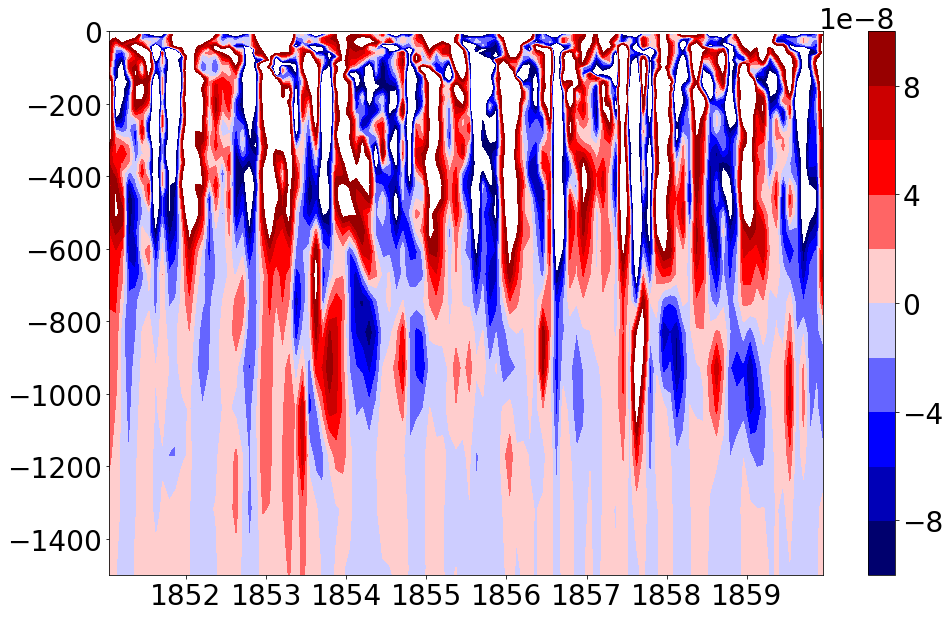

In [36]:
region=1
nt = ds33B.dims['Time']
plt.contourf(ds33B.Time[:nt].values,-dsM60.refBottomDepth,(ds33B.timeMonthly_avg_activeTracerAdvectionTendency_temperatureAdvectionTendency[:nt,region,:]).T, \
                                        levels=np.linspace(-1e-7,1e-7,11),cmap='seismic')
plt.colorbar()
plt.ylim(-1500,0)

(-1500, 0)

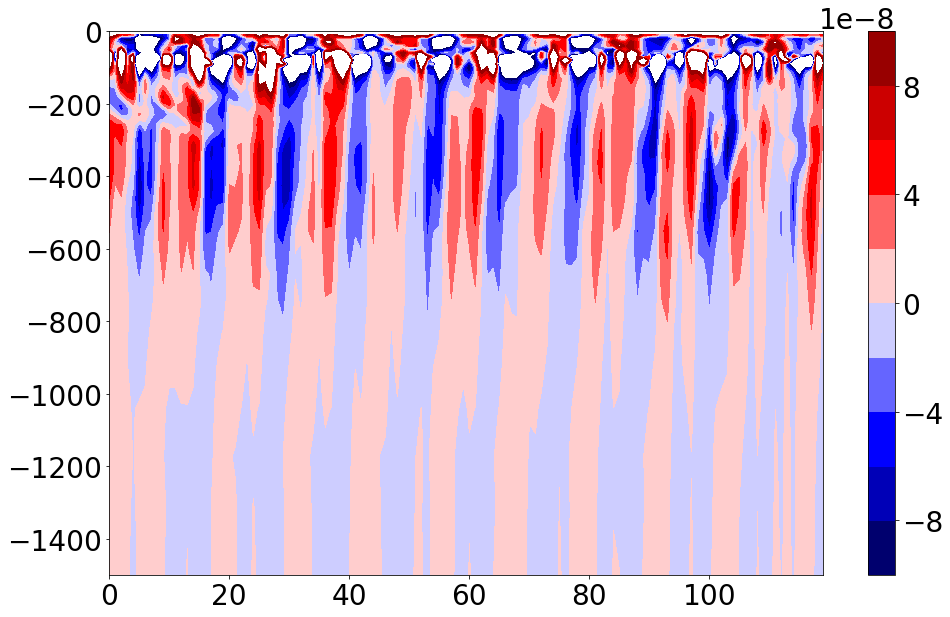

In [50]:
region=6
nt = ds.dims['Time']
plt.contourf(ds.Time[:nt].values,-dsM60.refBottomDepth,(ds.timeMonthly_avg_activeTracerAdvectionTendency_temperatureAdvectionTendency[:nt,region,:]).T, \
                                        levels=np.linspace(-1e-7,1e-7,11),cmap='seismic')
plt.colorbar()
plt.ylim(-1500,0)

(-1500, 0)

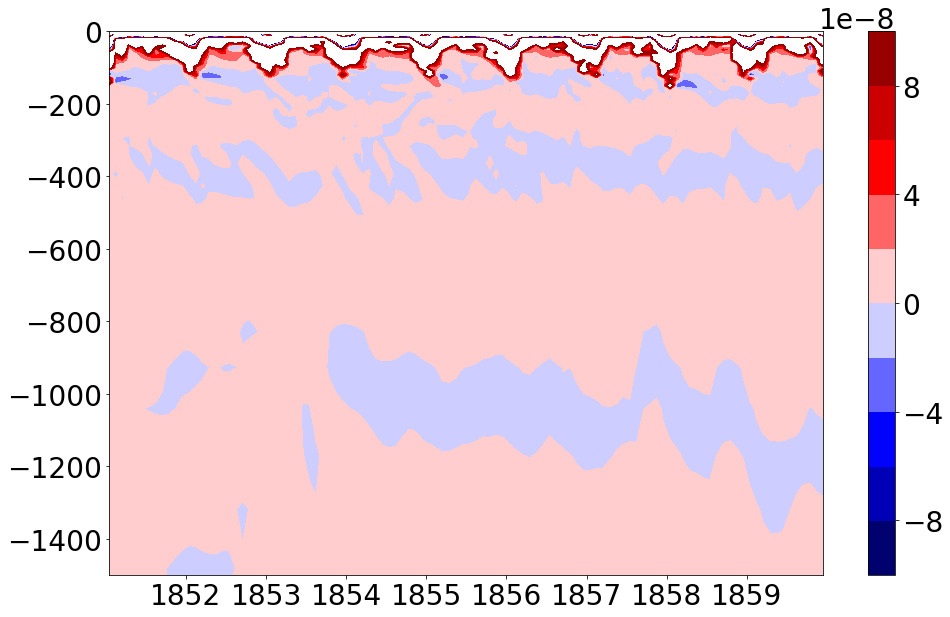

In [41]:
region=1
nt = ds33B.dims['Time']
plt.contourf(ds33B.Time[:nt].values,-dsM60.refBottomDepth,(ds33B.timeMonthly_avg_activeTracerVertMixTendency_temperatureVertMixTendency[:nt,region,:]).T, \
                                        levels=np.linspace(-1e-7,1e-7,11),cmap='seismic')
plt.colorbar()
plt.ylim(-1500,0)

(-1500, 0)

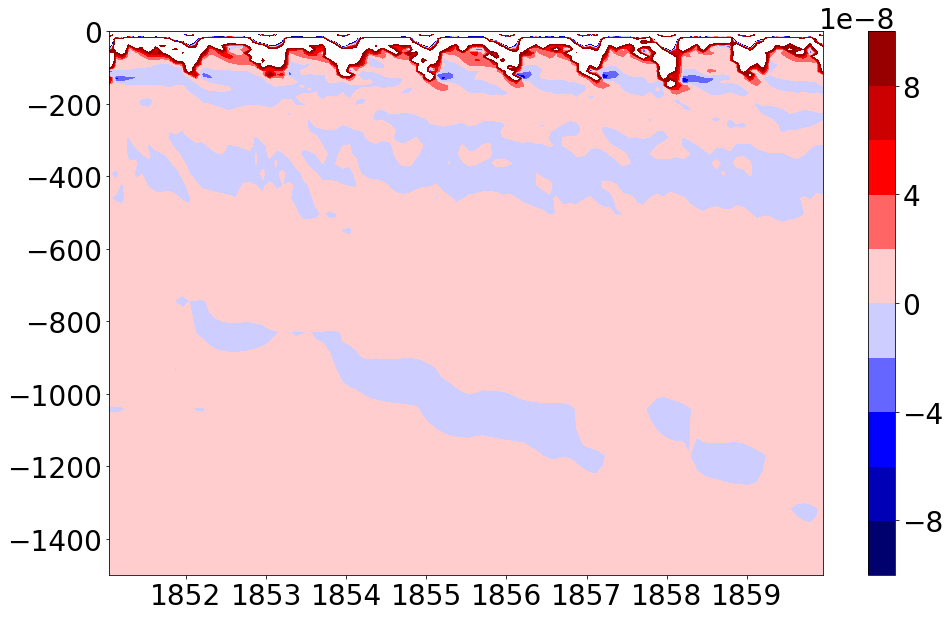

In [40]:
region=1
nt = ds33B.dims['Time']
plt.contourf(ds33B.Time[:nt].values,-dsM60.refBottomDepth,(ds33Old.timeMonthly_avg_activeTracerVertMixTendency_temperatureVertMixTendency[:nt,region,:]).T, \
                                        levels=np.linspace(-1e-7,1e-7,11),cmap='seismic')
plt.colorbar()
plt.ylim(-1500,0)

(-1500, 0)

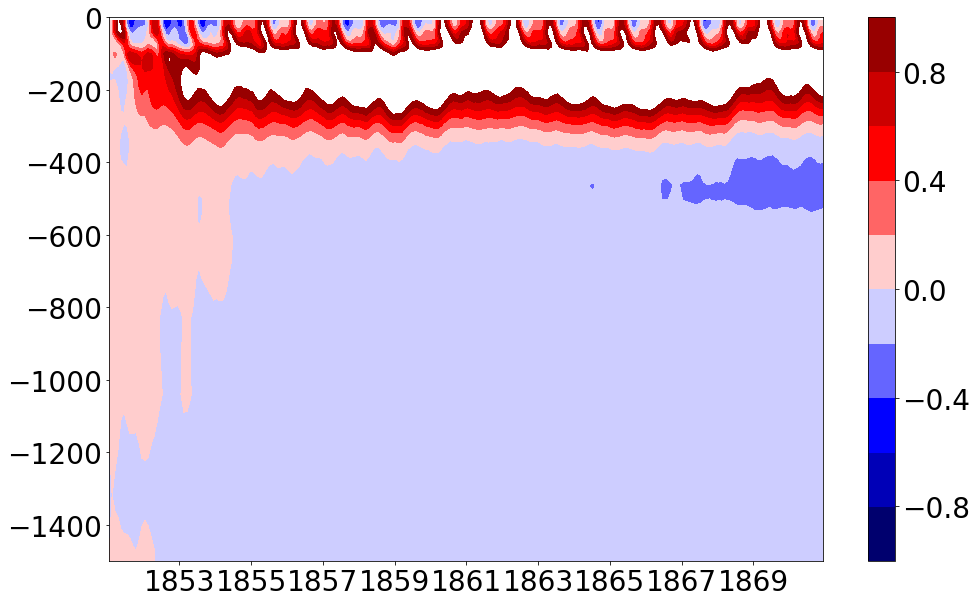

In [9]:
region=1
nt = ds33B.dims['Time']
plt.contourf(ds33B.Time[:nt].values,-dsM60.refBottomDepth,(ds33B.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[:nt,region,:]- \
                                         ds33B.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[0,region,:]).T, \
                                        levels=np.linspace(-1,1,11),cmap='seismic')
plt.colorbar()
plt.ylim(-1500,0)

(-5700, -2000)

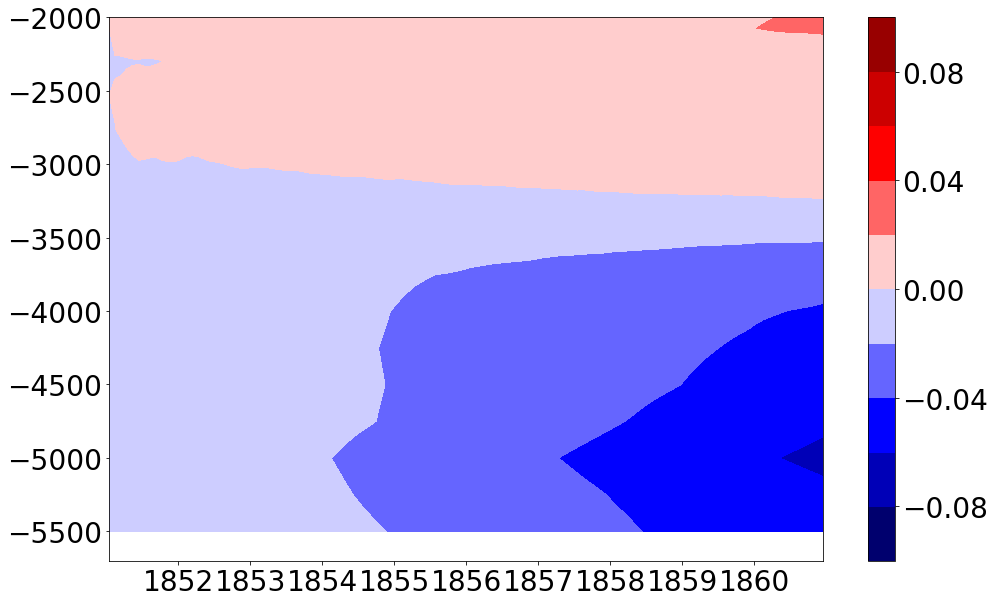

In [62]:
region=6
nt = ds33Old.dims['Time']
plt.contourf(ds33Old.Time[:nt].values,-dsM60.refBottomDepth,(ds33Old.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[:nt,region,:]- \
                                         ds33Old.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[0,region,:]).T, \
                                        levels=np.linspace(-.1,.1,11),cmap='seismic')
plt.colorbar()
plt.ylim(-5700,-2000)

(-1500, 0)

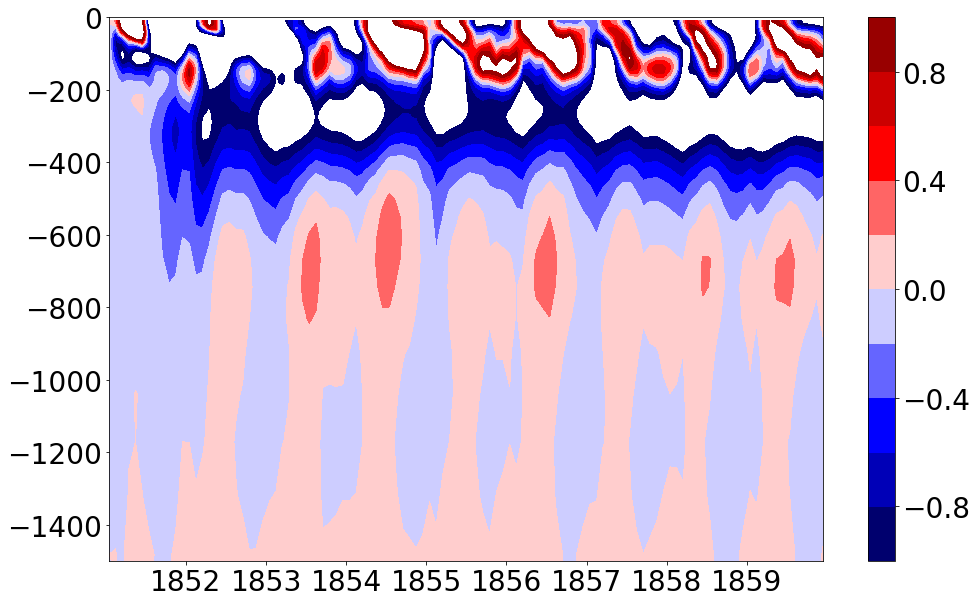

In [66]:
region=3
nt = ds33B.dims['Time']
plt.contourf(ds33B.Time[:nt].values,-dsM60.refBottomDepth,(ds33B.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[:nt,region,:]- \
                                         ds33B.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[0,region,:]).T, \
                                        levels=np.linspace(-1,1,11),cmap='seismic')
plt.colorbar()
plt.ylim(-1500,0)

In [ ]:
heat0 = ds33Old.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[0,region,:] * ds33M.

In [23]:
(ds33Old.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[:nt,region,:]- \
                                         )

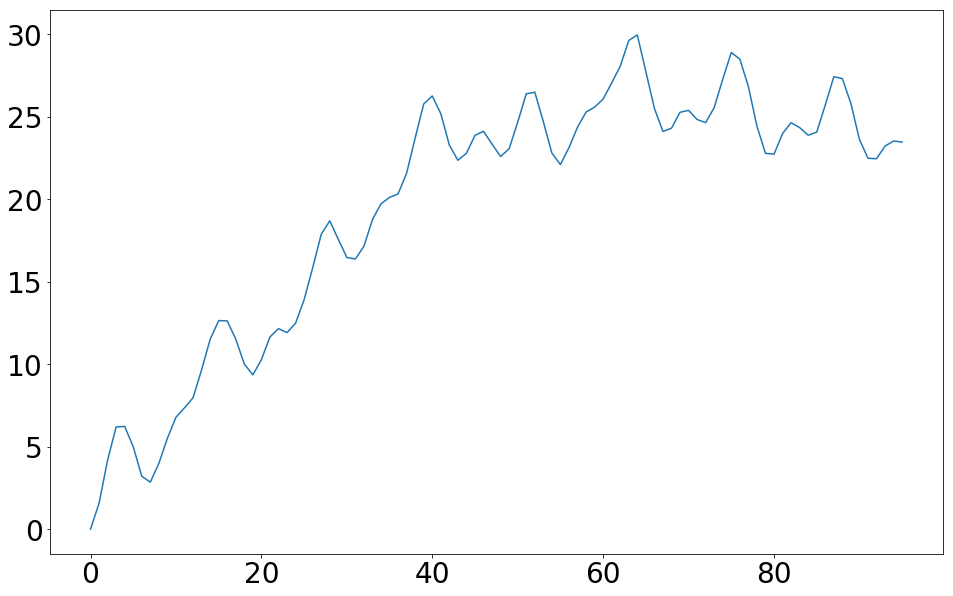

In [24]:
plt.plot(mat.sum(axis=1))

(-1500, 0)

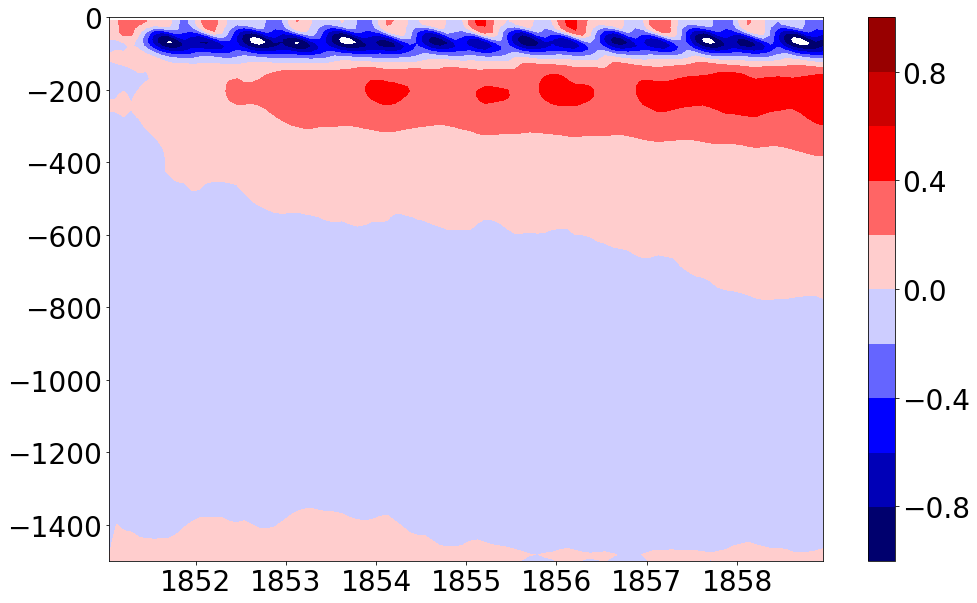

In [30]:
region=6
nt = ds33Old.dims['Time']
plt.contourf(ds33Old.Time[:nt].values,-dsM.refBottomDepth,(ds33Old.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[:nt,region,:]- \
                                         ds33Old.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[0,region,:]).T, \
                                        levels=np.linspace(-1,1,11),cmap='seismic')
plt.colorbar()
plt.ylim(-1500,0)

(-700, 0)

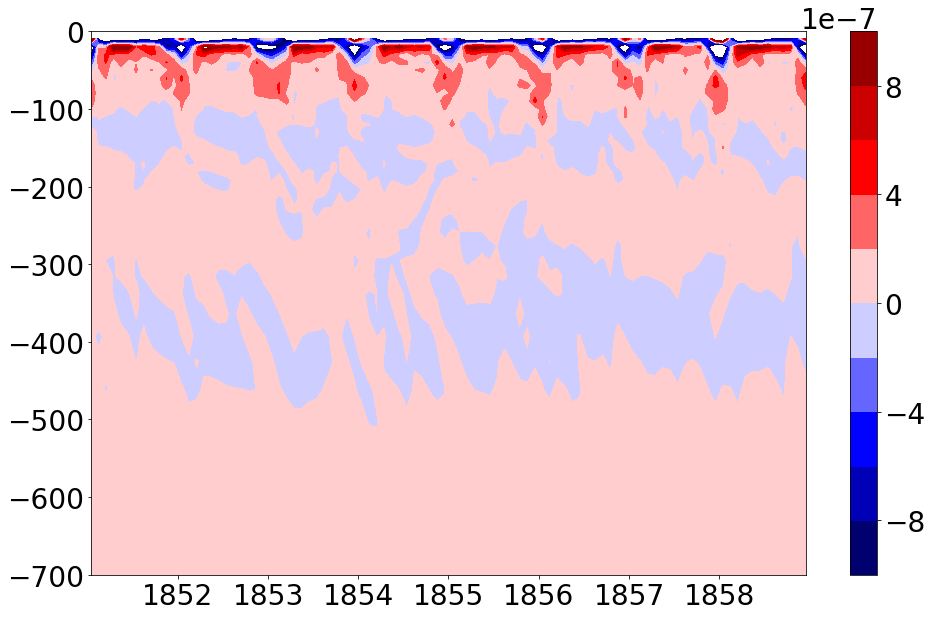

In [28]:
region=1
nt = ds33Old.dims['Time']
plt.contourf(ds33Old.Time[:nt].values,-dsM.refBottomDepth,(ds33Tend.timeMonthly_avg_activeTracerVertMixTendency_temperatureVertMixTendency[:nt,region,:]).T, \
                                        levels=np.linspace(-.5E-6,.5E-6,11),cmap='seismic')
plt.colorbar()
plt.ylim(-700,0)

In [ ]:
ds33B.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerSalinity

In [ ]:

plt.contourf(ds33.Time[:nt].values,-dsM.refBottomDepth,(ds33.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[:nt,region,:]- \
                                         ds33.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[0,region,:]).T, \
                                        levels=np.linspace(-1.6,1.6,11),cmap='seismic')
plt.colorbar()
plt.ylim(-500,0)
#plt.savefig('/home/lvanroe/Tchange_global_gcase_base.png')

In [ ]:
nt = len(ds33G.Time.values)

In [ ]:
region=3
plt.contourf(ds33G.Time[:nt].values,-ds60.refBottomDepth,(ds33G.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[:nt,region,:]- \
                                         ds33G.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[0,region,:]).T, \
                                        levels=np.linspace(-1.6,1.6,11),cmap='seismic')
plt.colorbar()
plt.ylim(-500,0)
#plt.savefig('/home/lvanroe/Tchange_global_60layer.png')

In [ ]:

nt=len(ds33G.Time.values)
plt.contourf(ds33G.Time[:nt].values,-dsM.refBottomDepth,(ds33G.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerBruntVaisalaFreqTop[:nt,region,:]).T, \
                                       levels=np.linspace(0,0.0003,8), cmap='seismic')
plt.colorbar()
plt.ylim(-500,0)

In [ ]:


plt.contourf(ds33.Time[:nt].values,-dsM.refBottomDepth,(ds33.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerBruntVaisalaFreqTop[:nt,region,:]).T, \
                                       levels=np.linspace(0,0.0003,8), cmap='seismic')
plt.colorbar()
plt.ylim(-500,0)

In [ ]:

nt=48
plt.contourf(ds33.Time[:nt].values,dsM.refZMid,(ds33.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerDivergence[:nt,region,:]).T, \
                                       levels=np.linspace(-1.5E-7,1.5E-7,10), cmap='seismic')
plt.colorbar()
plt.ylim(-500,0)

In [ ]:
plt.contourf(ds33.Time[:60].values,dsM.refZMid,(ds33.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerSalinity[:60,region,:]- \
                                         0.*ds33.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerSalinity[0,region,:]).T, \
                                        cmap='seismic')
plt.colorbar()
plt.ylim(-500,0)

In [ ]:
plt.contourf(ds33.Time[:nt].values,dsM.refZMid,(ds33.timeMonthly_avg_avgValueWithinOceanLayerRegion_avgLayerTemperature[:nt,region,:]).T,cmap='seismic')
plt.colorbar()
plt.ylim(-500,0)

In [ ]:
ds60 = xarray.open_dataset('/home/ccsm-data/inputdata/ocn/mpas-o/oEC60to30v3/oEC60to30v3_60layer.170506.nc')

In [ ]:
ds32.timeMonthly_avg_boundaryLayerDepth[ntt,inds].shape

In [ ]:
bld1 = ds32.timeMonthly_avg_boundaryLayerDepth[ntt,inds].values
bld = np.vstack((bld1, bld1)).T

In [ ]:
bb = bin_fields2(binningDict, bld, nBinsLatitude, 1)

In [ ]:
bb.shape

In [20]:
zv

array([ -1.50999999e+00,  -3.13499999e+00,  -4.88200021e+00,
        -6.76099944e+00,  -8.77999997e+00,  -1.09480007e+01,
        -1.32749989e+01,  -1.57720001e+01,  -1.84509995e+01,
        -2.13229988e+01,  -2.44000008e+01,  -2.76959999e+01,
        -3.12240021e+01,  -3.49989974e+01,  -3.90370057e+01,
        -4.33540008e+01,  -4.79670060e+01,  -5.28940017e+01,
        -5.81540024e+01,  -6.37670028e+01,  -6.97540085e+01,
        -7.61369979e+01,  -8.29390061e+01,  -9.01839950e+01,
        -9.78969986e+01,  -1.06103993e+02,  -1.14833995e+02,
        -1.24114995e+02,  -1.33976985e+02,  -1.44457005e+02,
        -1.55576991e+02,  -1.67377019e+02,  -1.79896999e+02,
        -1.93167027e+02,  -2.07227016e+02,  -2.22117039e+02,
        -2.37887019e+02,  -2.54577031e+02,  -2.72227046e+02,
        -2.90887028e+02,  -3.10607051e+02,  -3.31427006e+02,
        -3.53407039e+02,  -3.76606999e+02,  -4.01077022e+02,
        -4.26877019e+02,  -4.54057002e+02,  -4.82687016e+02,
        -5.12827022e+02,

In [32]:
zv.shape

(100,)

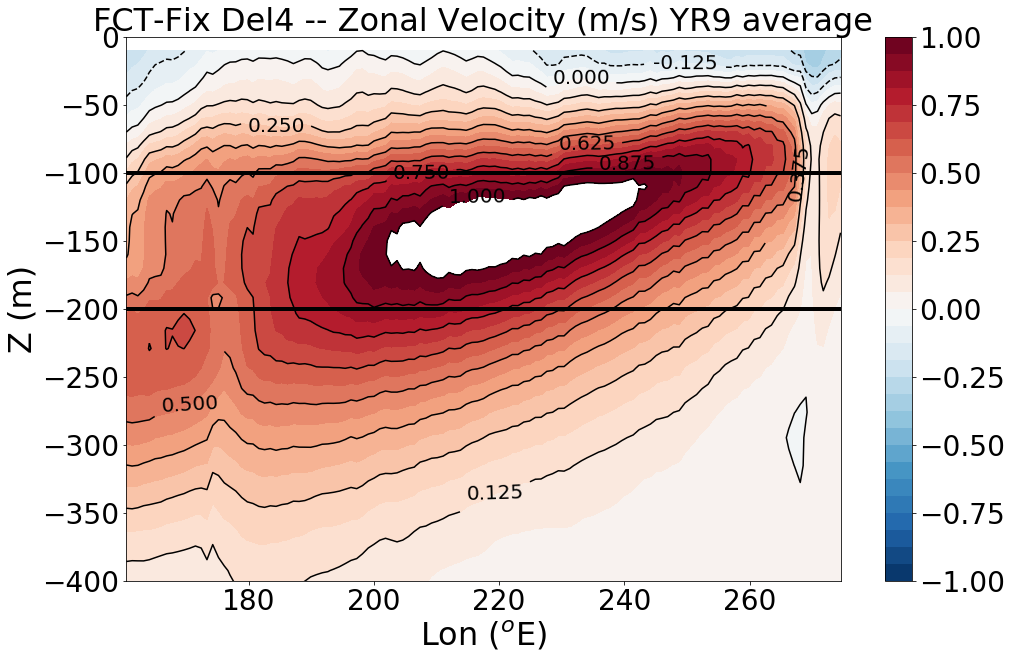

In [43]:
#nt = ds3B.dims['Time']
nVertLevels = ds3B.dims['nVertLevels']
ntt = 90
zv = -dsM60.refBottomDepth.values
for i in range(ntt,ntt+1):
    fig,ax=plt.subplots()
    
    sVal = i%12 - 1
    anom = ds3B.timeMonthly_avg_velocityZonal[i:i+12,inds,:].mean(dim='Time')

    
    binUControl = bin_fields2(binningDict, anom.values, \
                                      nBinsLatitude, nVertLevels)
    
#    bld1 = ds32.timeMonthly_avg_boundaryLayerDepth[ntt,inds].values
#    bld = np.vstack((bld1, bld1)).T

#    binBLD = bin_fields2(binningDict, bld, nBinsLatitude, 2)
    
    rtd = 180. / np.pi

    pc=ax.contourf(binCenterLatitude*rtd, zv, binUControl.T,levels=np.linspace(-1,1,33),cmap='RdBu_r')
    fig.colorbar(pc,ax=ax)
    
    Cs = ax.contour(binCenterLatitude*rtd, zv, binUControl.T,levels=np.linspace(-1,1,17),colors='k')
    min1 = binCenterLatitude[0]*rtd
    max1 = binCenterLatitude[-1]*rtd
    
    ax.plot(np.linspace(min1,max1,30),-100*np.ones(30),'k',linewidth=4)
#    ax.plot(binCenterLatitude*rtd, -binBLD[:,0],'r',linewidth=4)
    ax.plot(np.linspace(min1,max1,30),-200*np.ones(30),'k',linewidth=4)

    ax.clabel(Cs, inline=1,fontsize=20)

    ax.set_xlabel(r'Lon ($^o$E)',fontsize=32)
    ax.set_ylabel('Z (m)',fontsize=32)

    ax.set_ylim(-400,0)
    ax.set_title('FCT-Fix Del4 -- Zonal Velocity (m/s) YR9 average',fontsize=32)
#    fig.savefig('/home/lvanroe/TBcase60layer%d.png'%i)
#    plt.close()

In [ ]:
plt.scatter(ds.lonCell[inds],ds.latCell[inds],s=35,c=ds.vertViscTopOfCell[0,inds,25],vmin=0,vmax=0.1)

In [ ]:
np.where(ds.vertViscTopOfCell[0,inds,25] > 0.5)

In [ ]:
plt.plot(ds.bulkRichardsonNumber[0,inds[79],:50],ds.refZMid[:50])
plt.xlim(0,1)
plt.ylim(-100,0)

In [ ]:
shear = np.sqrt(ds.velocityMeridional[0,inds[11],:50]**2 + ds.velocityZonal[0,inds[11],:50]**2)
plt.plot(shear,ds.refZMid[:50])
plt.ylim(-100,0)

In [ ]:
plt.plot(ds.bulkRichardsonNumberBuoy[0,inds[11],:50],ds.refZMid[:50])
plt.ylim(-100,0)

In [ ]:
zv = dsEqB.refZMid[:].values
rtd = 180. / np.pi

plt.contourf(binCenterLatitude*rtd, zv, binUB.T,levels=np.linspace(-1,1,31),cmap='RdYlBu_r')
plt.colorbar()
Cs = plt.contour(binCenterLatitude*rtd, zv, binUB.T,levels=np.linspace(-.6,.8,8),colors='k')
plt.clabel(Cs, inline=1,fontsize=20)

plt.plot(np.linspace(140,275,30),-100*np.ones(30),'k',linewidth=4)

plt.plot(np.linspace(140,275,30),-200*np.ones(30),'k',linewidth=4)
plt.xlabel(r'Lon ($^o$E)',fontsize=32)
plt.ylabel('Z (m)',fontsize=32)
plt.xlim(140,275)
plt.ylim(-400,0)

In [ ]:
zv = dsEqB.refZMid[:].values
rtd = 180. / np.pi

plt.contourf(binCenterLatitude*rtd, zv, binTB.T,levels=np.linspace(0,33,31),cmap='RdYlBu_r')
plt.colorbar()
Cs = plt.contour(binCenterLatitude*rtd, zv, binTB.T,levels=np.linspace(0,33,17),colors='k')
plt.clabel(Cs, inline=1,fontsize=20)

plt.plot(np.linspace(140,275,30),-100*np.ones(30),'k',linewidth=4)

plt.plot(np.linspace(140,275,30),-200*np.ones(30),'k',linewidth=4)
plt.xlabel(r'Lon ($^o$E)',fontsize=32)
plt.ylabel('Z (m)',fontsize=32)
plt.xlim(140,275)
plt.ylim(-400,0)